# Setup

In [25]:
import numpy
import matplotlib.pyplot as plt
import cv2
from ipywidgets import interact
import glob
import pandas as pd
import numpy as np

In [27]:
%matplotlib inline

# Load data

In [45]:
root = '../'

In [46]:
train_image_folders = sorted(glob.glob(root + "train/train/*"))
test_image_folders = sorted(glob.glob(root + "test/test/*"))
print('Train images: {}'.format(len(train_image_folders)))
print('Test images: {}'.format(len(test_image_folders)))

Train images: 3633
Test images: 641


In [47]:
train_labels = pd.read_csv(root + 'train_labels.csv', index_col=False, dtype=object)
train_labels.head()

,Image,Label
0,0001,7333
1,0002,49534
2,0003,79129
3,0004,23266
4,0005,52026


In [96]:
def load_image(paths):
    image_files = []

    for f in paths:
        image_files.append(sorted(glob.glob(f +"/*")))
 
    images = []
    for ff in image_files:
        curr = []
        for f in ff:
            im = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
            curr.append(im)
        images.append(curr)
    return images

<IPython.core.display.Javascript object>


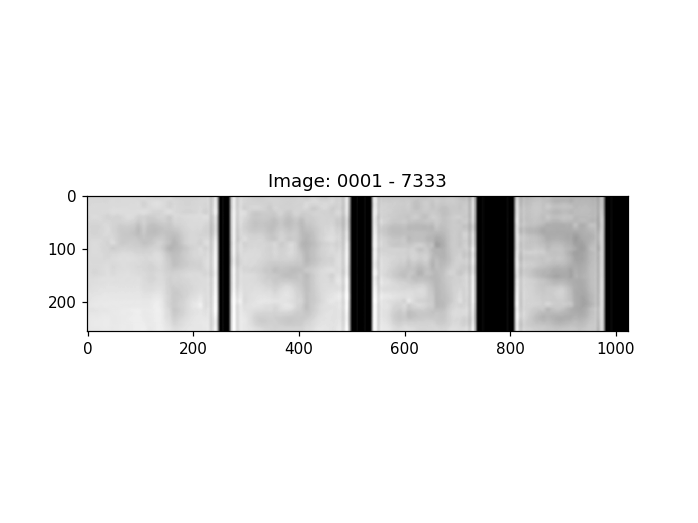

interactive(children=(IntSlider(value=0, description='i'), Output()), _dom_classes=('widget-interact',))

In [116]:
%matplotlib notebook
fig, ax = plt.subplots()

@interact(i=(0,100))
def plot(i=0):
    path = train_image_folders[i:i+1]
    imgs = load_image(path)[0]
    ax.clear()
    ax.imshow(np.hstack(imgs), cmap='gray')
    ax.set_title(f"Image: {train_labels['Image'].iloc[i]} - {train_labels['Label'].iloc[i]}")

fig.tight_layout()

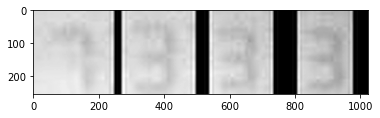

In [98]:
fig, ax = plt.subplots()

path = train_image_folders[0:1]
imgs = load_image(path)[0]
ax.clear()
ax.imshow(np.hstack(imgs), cmap='gray')
#ax.set_title(f"Image: {train_labels['Image'].iloc[i]} -  {train_labels['Label'].iloc[i]}")